In [1]:
# reference: https://www.analyticsvidhya.com/blog/\
# 2016/01/complete-tutorial-learn-data-science-python-scratch-2/

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# let's find out the data types of each column
# by doing this, we also get the column list, so save a call to df.columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# show the statistics for features contain numerical values
# we can see data are not clean, have missing items.
df.describe()

/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d479f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d6c5290>]], dtype=object)

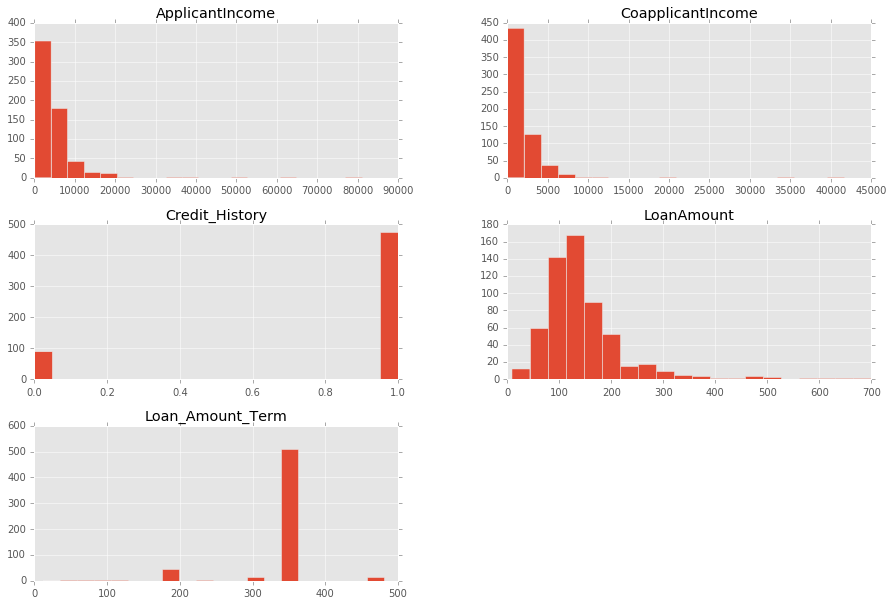

In [6]:
# Use histogram to visualize distribution of continuous features
#
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(bins=20, figsize=[15,10])

OrderedDict([('ApplicantIncome',
              {'boxes': [<matplotlib.lines.Line2D at 0x10e2861d0>],
               'caps': [<matplotlib.lines.Line2D at 0x10e293050>,
               'fliers': [<matplotlib.lines.Line2D at 0x10e2a3350>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x10e293cd0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x10dda7c10>,
                <matplotlib.lines.Line2D at 0x10e2869d0>]}),
             ('CoapplicantIncome',
              {'boxes': [<matplotlib.lines.Line2D at 0x10e2a3e90>],
               'caps': [<matplotlib.lines.Line2D at 0x10e2b1d10>,
               'fliers': [<matplotlib.lines.Line2D at 0x10e2ca050>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x10e2c09d0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x10e2a3fd0>,
                <matplotlib.lines.Line2D at 0x10e2b16d0>]}),
             ('LoanAmount',
              {'boxes': [<matplotlib.lin

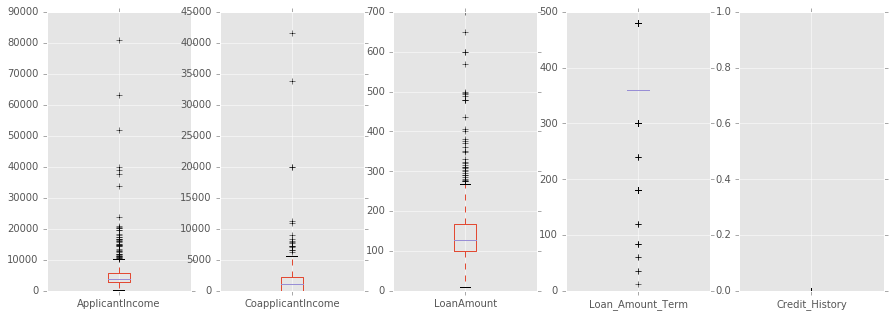

In [7]:
# from the hist chart, it seems income and loanamount distribution isn't normal
# and has some outliers, let's take a detailed look with boxplot

df.plot(kind='box', return_type='dict' , subplots = True, figsize=(15,5))

In [8]:
# With boxplot, we confirmed income data exists outliers. 

In [9]:
# Univariate Analysis for categorical features

categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical:
    print df[col].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


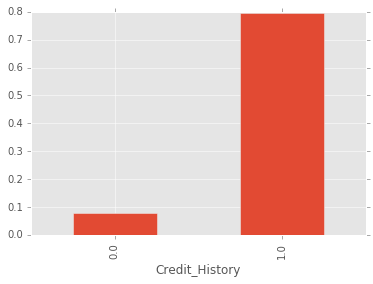

In [10]:
# Bi-Variate Analysis

# use pivot table if index is categorical values

# Use Pivot table explore relationship between Loan_Status and Credit_History
df.pivot_table(values='Loan_Status',
               index=['Credit_History'],
               aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()).plot(kind='bar')

In [11]:
# It shows the probability of getting a loan is 8 times higher with a credit history!

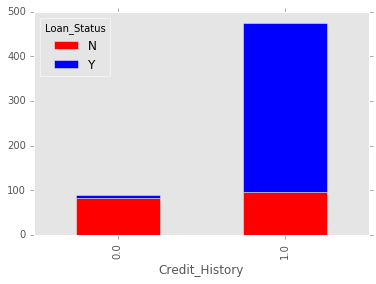

In [12]:
# Visualize the relationship between loan_status and credit history with stacked bar plot

pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind='bar',
                                                         stacked=True,
                                                         color=['red','blue'],
                                                         grid=False)

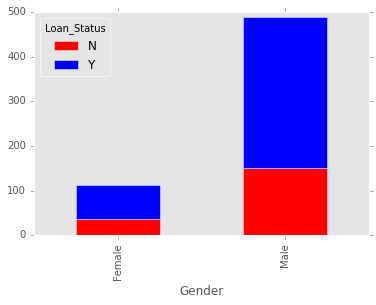

In [13]:
# explore Geder and Loan_Status relationship

pd.crosstab(df['Gender'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

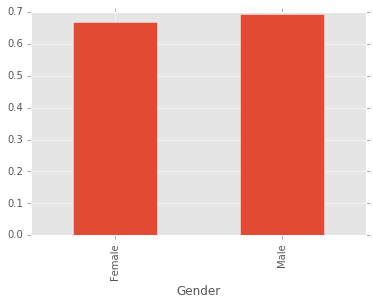

In [14]:
df.pivot_table(values='Loan_Status',
               index=['Gender'],
               aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()).plot(kind='bar')

In [15]:
# Nothing interesting.

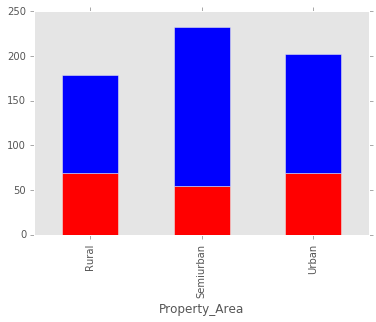

In [16]:
# explroe Property_Area and Loan_status, not much.

pd.crosstab(df['Property_Area'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False, legend=False)

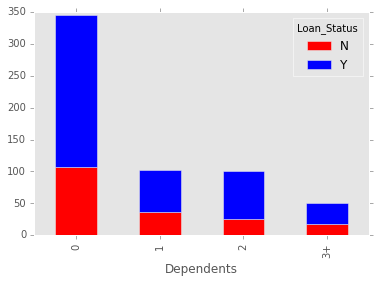

In [17]:
# Loan_status and Dependents

pd.crosstab(df['Dependents'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [18]:
# Data munging

# find out NaN values.  x is the Serie type.
df.apply(lambda x: x.isnull().sum()) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Treat the Missing values in Self_Employed

# check the value distribution
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
# FE-1: From the distribution, replace missing with NO is a good guess.
df['Self_Employed'].fillna('No',inplace=True)

In [21]:
# Treat the missing values in Loan Amount

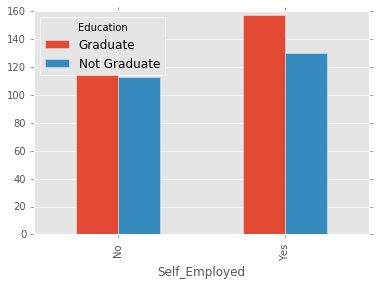

In [22]:
# Domain knowledge tells us loan amount would be associate with Self_Employed,
# since self employed would need more money.

# FE-2a
# let's use Pivot table to examine how loan amount is aggregated
# we use self employed status as index and Education values as columns
# later we can swap education to something else if we think it affect loan amount.
table = df.pivot_table(values='LoanAmount', 
                       index='Self_Employed',
                       columns='Education', # columns are categorical values of Education
                       aggfunc=np.median) 

table.plot(kind='bar')

In [23]:
# FE-2b Replace missing values with the sub-category median.
# this is better than use median of all because sub-category differs.

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [24]:
# Let's see missing values in Gender
df[df['Gender'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N


In [25]:
# it seems that we might guess the gender based ApplicantIncome and CoapplicantIncome
# FE-3a

df['BreadWinner']=df['ApplicantIncome']>df['CoapplicantIncome']
df['BreadWinner'].value_counts()

True     541
False     73
Name: BreadWinner, dtype: int64

In [26]:
# FE-3b Now let's treat missing values in gender

df.loc[(df['BreadWinner']) & (df['Gender'].isnull()),'Gender'] = 'Male'
df.loc[(~df['BreadWinner']) & (df['Gender'].isnull()),'Gender'] = 'FeMale'

In [27]:
df[df['Dependents'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BreadWinner
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,130.0,360.0,1.0,Urban,Y,True
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,True
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y,True
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N,True
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,True


In [28]:
# FE-4a convert Dependents to integer, excluding null values

# this take a column/Series, so x is an element of Series.
df['Dependents'] = df['Dependents'].apply(lambda x: int(x.replace('+','')) if pd.notnull(x) else None)

In [29]:
df['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

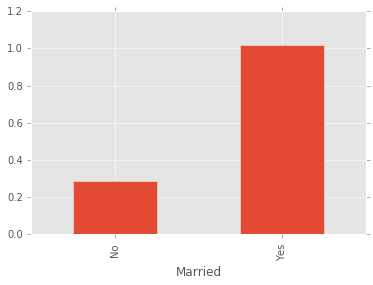

In [30]:
# Find out mean dependents in two groups: Married and not Married

table = df.pivot_table(values='Dependents', 
                       index='Married',
                       #columns='Education', # columns are categorical values of Education                      
                       aggfunc=np.mean)
table.plot(kind='bar')

In [31]:
df['Dependents'].mean()

0.76293823038397324

In [32]:
# so on average, married group has 3 times dependents than not married.
# here is how to fill the missing values in dependents
# - if married, fill 1 ( subgroup mean)
# - if not married, fill ( 0, close to subgroup mean)
# - if don't know, fill 1 ( group mean )

# FE-4b
df.loc[(df['Dependents'].isnull()) & (df['Married']=='No'),'Dependents'] = 0
df['Dependents'].fillna(1, inplace = True)
# FE-4c create another feature HasDependents
df['hasDependents'] = df['Dependents']>0

In [33]:
# check missing values in Married

df[df['Married'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BreadWinner,hasDependents
104,LP001357,Male,NaN,1.0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,True,True
228,LP001760,Male,NaN,1.0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,True,True
435,LP002393,Female,NaN,1.0,Graduate,No,10047,0.0,130.0,240.0,1.0,Semiurban,Y,True,True


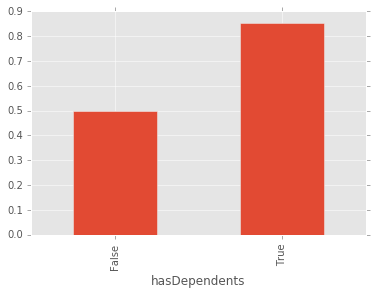

In [34]:
# find out the percentage of married in two catergory: has dependents or no dependents
table = df.pivot_table(values='Married', 
                       index='hasDependents',                      
                       aggfunc=lambda x:x.map({'Yes':1,'No':0}).mean())
table.plot(kind='bar')

In [35]:
# FE-5a
df['DoubleIncome'] = df['CoapplicantIncome']>0

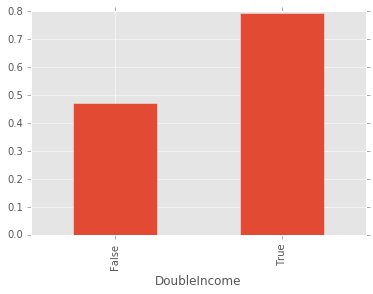

In [36]:
table = df.pivot_table(values='Married', 
                       index='DoubleIncome',                      
                       aggfunc=lambda x:x.map({'Yes':1,'No':0}).mean())
table.plot(kind='bar')

In [37]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
# FE-5b Fill missing values in Married 

# one can either use doubleincome or majority value
# let's choose double income
df.loc[(df['Married'].isnull()) & (df['DoubleIncome']), 'Married'] = 'Yes'
df['Married'].fillna('No', inplace=True)

In [39]:
# Loan_Amount_Term
df[df['Loan_Amount_Term'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BreadWinner,hasDependents,DoubleIncome
19,LP001041,Male,Yes,0.0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,False,False,True
36,LP001109,Male,Yes,0.0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,True,False,True
44,LP001136,Male,Yes,0.0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,True,False,False
45,LP001137,Female,No,0.0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,True,False,False
73,LP001250,Male,Yes,3.0,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,True,True,False


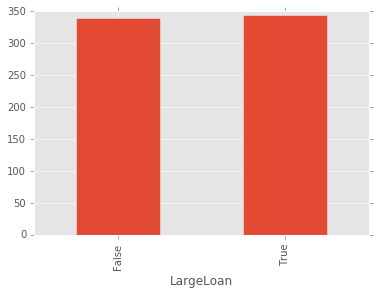

In [40]:
# Loan_Amount_Term should be related to LoanAmount

# let's find out if large loan has a longer term

# this is one way to change continuous feature to categorical so that we can pivot.
# FE-6a
df['LargeLoan'] = df['LoanAmount']>df['LoanAmount'].median()
table = df.pivot_table(values='Loan_Amount_Term', 
                       index='LargeLoan',                     
                       aggfunc=np.mean)
table.plot(kind='bar')

In [41]:
# it turns out that mean loan term is same, no matter large or small loan.

# FE-6
df['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [42]:
# view the missing credit history data

df[df['Credit_History'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,BreadWinner,hasDependents,DoubleIncome,LargeLoan
16,LP001034,Male,No,1.0,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,True,True,False,False
24,LP001052,Male,Yes,1.0,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N,True,True,True,True
30,LP001091,Male,Yes,1.0,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N,True,True,True,True
42,LP001123,Male,Yes,0.0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,True,False,False,False
79,LP001264,Male,Yes,3.0,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y,True,True,True,True


In [43]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [44]:
# no idea how to infer credit history, look like 1 is majority
# however, it is the major effect on loan status
# it is a hard choice. 50 records is ~8% of data
# by comparing the two results, chooseing drop these is better.

# FE-7
df.dropna(inplace = True)
#df['Credit_History'].fillna(1,inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f3dced0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f4dd910>]], dtype=object)

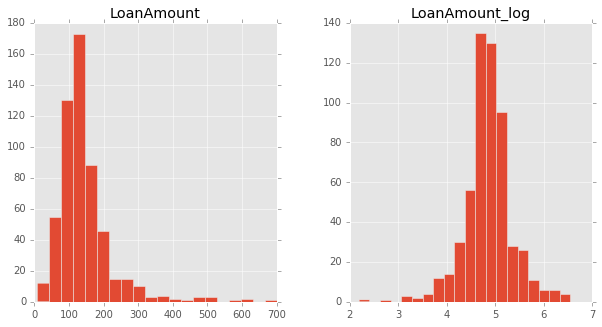

In [45]:
# let's treat extremes

# Loan Amount

# FE-8
# use log to transform distribution
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df[['LoanAmount','LoanAmount_log']].hist(bins=20, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f56af50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f730dd0>]], dtype=object)

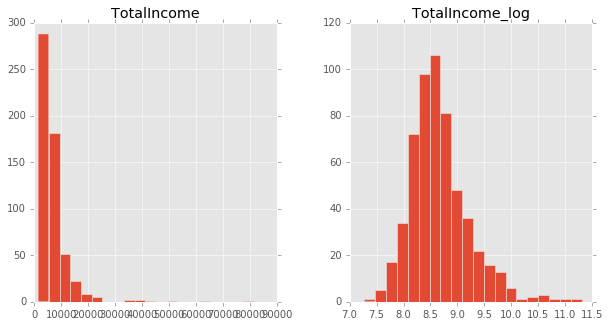

In [46]:
# Income treatment

# create a new TotalIncome feature
# use log to make distribution look better.

# FE-9
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df[['TotalIncome','TotalIncome_log']].hist(bins=20, figsize = (10,5)) 

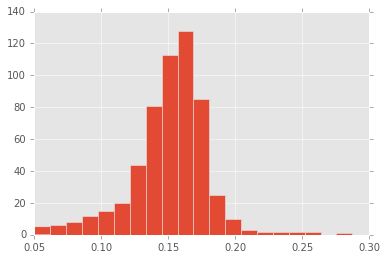

In [47]:
# with some domain knowledge, we know loan status is related to debit ratio,
# let's create a new feature DebitRatio

import math
# FE-10
df['DebitRatio'] = (df['LoanAmount']/df['TotalIncome']).apply(lambda x:math.sqrt(x))
df['DebitRatio'].hist(bins=20)

In [48]:
# let's encode values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Gender','Married','Dependents','Education','Self_Employed',
           'Property_Area','Loan_Status','BreadWinner','hasDependents','DoubleIncome',
          'LargeLoan']
for i in var_mod:
    df[i] = le.fit_transform(df[i]) 

In [49]:
# done with feature engineering! Now let's take a look:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,BreadWinner,hasDependents,DoubleIncome,LargeLoan,LoanAmount_log,TotalIncome,TotalIncome_log,DebitRatio
0,LP001002,2,0,0,0,0,5849,0.0,130.0,360.0,...,2,1,1,0,0,1,4.867534,5849.0,8.674026,0.149084
1,LP001003,2,1,1,0,0,4583,1508.0,128.0,360.0,...,0,0,1,1,1,0,4.852030,6091.0,8.714568,0.144964
2,LP001005,2,1,0,0,1,3000,0.0,66.0,360.0,...,2,1,1,0,0,0,4.189655,3000.0,8.006368,0.148324
3,LP001006,2,1,0,1,0,2583,2358.0,120.0,360.0,...,2,1,1,0,1,0,4.787492,4941.0,8.505323,0.155842
4,LP001008,2,0,0,0,0,6000,0.0,141.0,360.0,...,2,1,1,0,0,1,4.948760,6000.0,8.699515,0.153297


In [50]:
# feature extraction 

# since the test performance is a lot worse than training, xgb is overfit. 
# dimension reduction-> select few features based on xgb feature importance.
predictor_var =['Credit_History','LoanAmount_log', 'TotalIncome_log', 'DebitRatio']
"""
predictor_var =['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log',
                'TotalIncome_log','DebitRatio','BreadWinner','DoubleIncome',
                'hasDependents','LargeLoan']
                
"""             
outcome_var = 'Loan_Status'

In [51]:
"""
# one hot encoding of nominal features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0],sparse=False)
X=ohe.fit_transform(df[predictor_var])
y=df[outcome_var]

OHE may produce sparse matrix and increase columns, which distrupt plot feature importance.
"""

'\n# one hot encoding of nominal features\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder(categorical_features=[0],sparse=False)\nX=ohe.fit_transform(df[predictor_var])\ny=df[outcome_var]\n\nOHE may produce sparse matrix and increase columns, which distrupt plot feature importance.\n'

In [52]:
X, y = df[predictor_var], df[outcome_var]

In [53]:
"""
# Standarize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(df[predictor_var])
y=df[outcome_var]
"""

'\n# Standarize\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX=sc.fit_transform(df[predictor_var])\ny=df[outcome_var]\n'

In [54]:
assert( np.isfinite(X).all().all() & np.isfinite(y).all() )

In [55]:
# now let's pick some models to predict loan status

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


In [56]:
"""
#Generic function for making a classification model and accessing performance:
def classification_model(model, X, y): 
  #Fit the model:
  model.fit(X,y)
  
  #Make predictions on training set:
  predictions = model.predict(X)
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,y)
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(X.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = X[train,:]
    
    # The target we're using to train the algorithm.
    train_target = y[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(X[test,:], y[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(X,y) 
"""  

'\n#Generic function for making a classification model and accessing performance:\ndef classification_model(model, X, y): \n  #Fit the model:\n  model.fit(X,y)\n  \n  #Make predictions on training set:\n  predictions = model.predict(X)\n  \n  #Print accuracy\n  accuracy = metrics.accuracy_score(predictions,y)\n  print "Accuracy : %s" % "{0:.3%}".format(accuracy)\n\n  #Perform k-fold cross-validation with 5 folds\n  kf = KFold(X.shape[0], n_folds=5)\n  error = []\n  for train, test in kf:\n    # Filter training data\n    train_predictors = X[train,:]\n    \n    # The target we\'re using to train the algorithm.\n    train_target = y[train]\n    \n    # Training the algorithm using the predictors and target.\n    model.fit(train_predictors, train_target)\n    \n    #Record error from each cross-validation run\n    error.append(model.score(X[test,:], y[test]))\n \n  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))\n\n  #Fit the model again so that it can be refered ou

In [57]:
lr_model = LogisticRegression()
classification_model(lr_model, df, predictor_var, outcome_var)
#classification_model(lr_model, X, y)

Accuracy : 81.560%
Cross-Validation Score : 81.564%


In [58]:
dt_model = DecisionTreeClassifier()
classification_model(dt_model, df, predictor_var, outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 72.870%


In [59]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5,min_samples_leaf=1)
classification_model(rf_model, df, predictor_var, outcome_var)
#classification_model(rf_model, X,y)

Accuracy : 83.333%
Cross-Validation Score : 81.032%


In [60]:
"""
from sklearn.grid_search import GridSearchCV   #Perforing grid search

param_test = {
    'max_depth':range(1,4,1),
    'min_samples_split':range(1,10,4),
    'min_samples_leaf':range(1,10,4),
}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=30), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, verbose=0)

gsearch1.fit(X, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
"""

"\nfrom sklearn.grid_search import GridSearchCV   #Perforing grid search\n\nparam_test = {\n    'max_depth':range(1,4,1),\n    'min_samples_split':range(1,10,4),\n    'min_samples_leaf':range(1,10,4),\n}\n\ngsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=30), \n param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5, verbose=0)\n\ngsearch1.fit(X, y)\ngsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_\n"

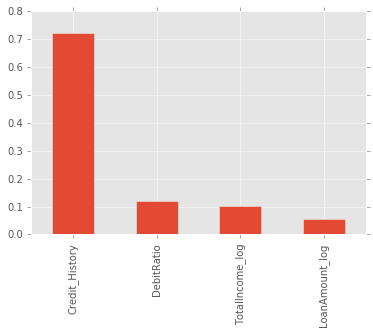

In [61]:
#Create a series with feature importances:
featimp = pd.Series(rf_model.feature_importances_, index=predictor_var).sort_values(ascending=False)
featimp.plot(kind='bar')

modelfit...
[0]	train-auc:0.64963	test-auc:0.511182
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 20 rounds.
[1]	train-auc:0.833469	test-auc:0.72456
[2]	train-auc:0.850069	test-auc:0.725621
[3]	train-auc:0.8625	test-auc:0.742734
[4]	train-auc:0.869444	test-auc:0.741638
[5]	train-auc:0.875827	test-auc:0.73966
[6]	train-auc:0.876596	test-auc:0.73743
[7]	train-auc:0.88088	test-auc:0.74174
[8]	train-auc:0.88252	test-auc:0.74477
[9]	train-auc:0.886688	test-auc:0.74265
[10]	train-auc:0.888056	test-auc:0.744542
[11]	train-auc:0.892758	test-auc:0.745135
[12]	train-auc:0.895032	test-auc:0.743504
[13]	train-auc:0.899987	test-auc:0.74708
[14]	train-auc:0.902023	test-auc:0.748626
[15]	train-auc:0.905791	test-auc:0.747783
[16]	train-auc:0.908889	test-auc:0.742526
[17]	train-auc:0.912191	test-auc:0.742184
[18]	train-auc:0.914561	test-auc:0.742385
[19]	train-auc:0.916897	test-auc:0.743301
[20]	train-auc:0.918531	test-

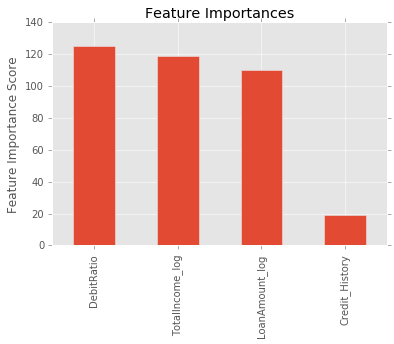

In [75]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.cross_validation import train_test_split

X,y = df[predictor_var], df[outcome_var]
def modelfit(alg, X, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=20):
    print "modelfit..."
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        dtrain = xgb.DMatrix(X,label=y)
        cvresult = xgb.cv(xgb_param,
                          dtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                                     xgb.callback.early_stop(early_stopping_rounds)]
                         )
        
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)
xgb2 = modelfit(xgb1, X, y)

In [76]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df[predictor_var], df[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.74685, std: 0.03515, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.74733, std: 0.04594, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.74835, std: 0.04071, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.74900, std: 0.03744, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.75217, std: 0.04727, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.74967, std: 0.04145, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.75019, std: 0.03487, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.74829, std: 0.04465, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.74332, std: 0.04041, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.74586, std: 0.03754, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.74271, std: 0.04539, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.74378, std: 0.04347, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 3

In [62]:
# go one step around the optimal 

param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[3,4,5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df[predictor_var], df[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77123, std: 0.05782, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.76681, std: 0.04734, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.75683, std: 0.04466, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.76789, std: 0.05708, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.76444, std: 0.04981, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.75928, std: 0.04630, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.77104, std: 0.05516, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.75982, std: 0.05133, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.75658, std: 0.04785, params: {'max_depth': 8, 'min_child_weight': 5}],
 {'max_depth': 6, 'min_child_weight': 3},
 0.77123067408781698)

In [64]:
max_depth = 6
min_child_weight = 3

In [65]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df[predictor_var], df[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77123, std: 0.05782, params: {'gamma': 0.0},
  mean: 0.77102, std: 0.05724, params: {'gamma': 0.1},
  mean: 0.76833, std: 0.05527, params: {'gamma': 0.2},
  mean: 0.77177, std: 0.05549, params: {'gamma': 0.3},
  mean: 0.76784, std: 0.05733, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.77176664605236034)

In [67]:
gamma = 0.3

In [72]:
# recaliber the n_estimators to 1000
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=max_depth,
 min_child_weight=min_child_weight,
 gamma=gamma,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)
modelfit(xgb2, df[predictor_var], df[outcome_var])

NameError: name 'max_depth' is not defined

In [69]:
# check if the score is increased.

# continue tuning subsample and colsample. 0.6-0.9
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=gamma, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df[predictor_var], df[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75411, std: 0.05244, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.75233, std: 0.04444, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.75176, std: 0.04932, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.75753, std: 0.04791, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.75411, std: 0.05244, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.75233, std: 0.04444, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.75176, std: 0.04932, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.75753, std: 0.04791, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.76055, std: 0.04204, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.75860, std: 0.06103, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.77177, std: 0.05549, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.76935, std: 0.05326, params: {'subsample': 0.9, 'colsample_bytree'

In [71]:
# now reduce step to .05. 
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=gamma, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(df[predictor_var], df[outcome_var])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77847, std: 0.05756, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.77177, std: 0.05549, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.76916, std: 0.05073, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.77847, std: 0.05756, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.77177, std: 0.05549, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.76916, std: 0.05073, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.77847, std: 0.05756, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.77177, std: 0.05549, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.76916, std: 0.05073, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.75, 'subsample': 0.75},
 0.77846732632446902)

In [72]:
subsample = 0.75
colsample_bytree = 0.75

In [74]:
# now tuning alpha
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

# notice we updated colsample
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(df[predictor_var], df[outcome_var])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.77847, std: 0.05756, params: {'reg_alpha': 1e-05},
  mean: 0.77645, std: 0.05688, params: {'reg_alpha': 0.01},
  mean: 0.77178, std: 0.05824, params: {'reg_alpha': 0.1},
  mean: 0.77017, std: 0.05902, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.77846732632446902)

In [76]:
reg_alpha = 1e-5

modelfit...
[0]	train-auc:0.788905	test-auc:0.757793
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 10 rounds.
[1]	train-auc:0.818274	test-auc:0.74426
[2]	train-auc:0.835151	test-auc:0.739493
[3]	train-auc:0.857264	test-auc:0.757748
[4]	train-auc:0.86606	test-auc:0.755504
[5]	train-auc:0.872798	test-auc:0.766369
[6]	train-auc:0.876041	test-auc:0.761296
[7]	train-auc:0.877599	test-auc:0.753176
[8]	train-auc:0.881085	test-auc:0.752826
[9]	train-auc:0.886568	test-auc:0.753343
[10]	train-auc:0.888502	test-auc:0.75322
[11]	train-auc:0.894802	test-auc:0.755307
[12]	train-auc:0.899289	test-auc:0.757049
[13]	train-auc:0.900508	test-auc:0.76129
[14]	train-auc:0.902534	test-auc:0.761431
[15]	train-auc:0.905025	test-auc:0.760294
Stopping. Best iteration:
[5]	train-auc:0.872798+0.00725671	test-auc:0.766369+0.056691


Model Report
Accuracy : 0.828
AUC Score (Train): 0.874461


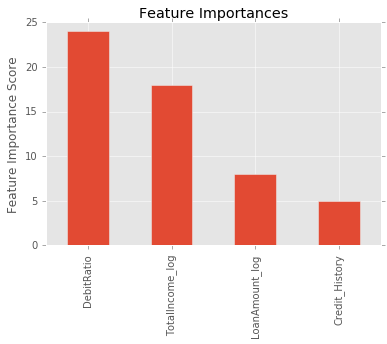

In [78]:
# recaliber the n_estimators to 1000
xgb7 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=max_depth,
 min_child_weight=min_child_weight,
 gamma=gamma,
 subsample=subsample,
 colsample_bytree=colsample_bytree,
 reg_alpha = reg_alpha,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)
modelfit(xgb7, df[predictor_var], df[outcome_var])

In [79]:
param_test = {
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(df[predictor_var], df[outcome_var])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.77460, std: 0.05226, params: {'reg_lambda': 1e-05},
  mean: 0.77436, std: 0.05290, params: {'reg_lambda': 0.01},
  mean: 0.77272, std: 0.05325, params: {'reg_lambda': 0.1},
  mean: 0.77847, std: 0.05756, params: {'reg_lambda': 1},
  mean: 0.76081, std: 0.05034, params: {'reg_lambda': 100}],
 {'reg_lambda': 1},
 0.77846732632446902)

In [80]:
reg_lambda = 1

In [81]:
param_test = {
 'reg_lambda':[0.2, 0.5, 1, 10, 50]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=max_depth,
 min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=555), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(df[predictor_var], df[outcome_var])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.76570, std: 0.05825, params: {'reg_lambda': 0.2},
  mean: 0.77289, std: 0.05106, params: {'reg_lambda': 0.5},
  mean: 0.77847, std: 0.05756, params: {'reg_lambda': 1},
  mean: 0.77088, std: 0.05640, params: {'reg_lambda': 10},
  mean: 0.76978, std: 0.05025, params: {'reg_lambda': 50}],
 {'reg_lambda': 1},
 0.77846732632446902)

modelfit...
[0]	train-auc:0.816352	test-auc:0.780175
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 10 rounds.

Model Report
Accuracy : 0.8262
AUC Score (Train): 0.805006


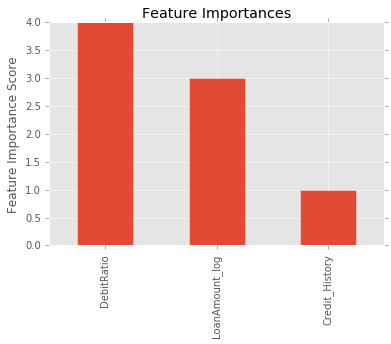

In [82]:
# lower learning rate and increase # n_estimators

xgb8 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=max_depth,
 min_child_weight=min_child_weight,
 gamma=gamma,
 subsample=subsample,
 colsample_bytree=colsample_bytree,
 reg_alpha = reg_alpha,
 reg_lambda = reg_lambda,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)
modelfit(xgb2, df[predictor_var], df[outcome_var])


modelfit...
[0]	train-auc:0.810337	test-auc:0.76429
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 10 rounds.
[1]	train-auc:0.838095	test-auc:0.748771
[2]	train-auc:0.854411	test-auc:0.761038
[3]	train-auc:0.861492	test-auc:0.772288
[4]	train-auc:0.865516	test-auc:0.766143
[5]	train-auc:0.871171	test-auc:0.77005
[6]	train-auc:0.876481	test-auc:0.76821
[7]	train-auc:0.879353	test-auc:0.763105
[8]	train-auc:0.879814	test-auc:0.762643
[9]	train-auc:0.886866	test-auc:0.765448
[10]	train-auc:0.889563	test-auc:0.77328
[11]	train-auc:0.892614	test-auc:0.77483
[12]	train-auc:0.898016	test-auc:0.769778
[13]	train-auc:0.897971	test-auc:0.769879
[14]	train-auc:0.900143	test-auc:0.76285
[15]	train-auc:0.901837	test-auc:0.765246
[16]	train-auc:0.906998	test-auc:0.7597
[17]	train-auc:0.911438	test-auc:0.762876
[18]	train-auc:0.912236	test-auc:0.76368
[19]	train-auc:0.91324	test-auc:0.763994
[20]	train-auc:0.914142	tes

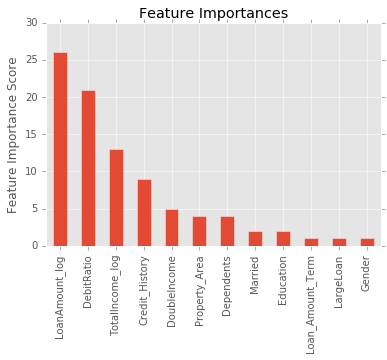

In [1171]:
# unfortunately, it doesn't improve.

# final 
# we stick with alpha = 1e-5. 

# recaliber the n_estimators to 1000
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=2,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.6,
 reg_alpha = 1e-5,
 reg_lambda = 0.2,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)
modelfit(xgb2, df[predictor_var], df[outcome_var])


In [65]:
# Now we have the model trained. Let's process the test data and predict

print test_df.apply(lambda x:sum(x.isnull()), axis=0)

# FE-1
test_df['Self_Employed'].fillna('No',inplace=True)

# FE-2
table = test_df.pivot_table(values='LoanAmount', 
                       index='Self_Employed',
                       columns='Education', # columns are categorical values of Education
                       aggfunc=np.median)
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

# FE-3 Now let's treat missing values in gender
test_df['BreadWinner']=test_df['ApplicantIncome']>test_df['CoapplicantIncome']
test_df.loc[(test_df['BreadWinner']) & (test_df['Gender'].isnull()),'Gender'] = 'Male'
test_df['Gender'].fillna('Female', inplace=True)

# FE-4a Dependents
test_df['Dependents'] = test_df['Dependents'].apply(lambda x: int(x.replace('+','')) if pd.notnull(x) else None)
# FE-4b
test_df.loc[(test_df['Dependents'].isnull()) & (test_df['Married']=='No'),'Dependents'] = 0
test_df['Dependents'].fillna(1, inplace = True)
# FE-4c create another feature HasDependents
test_df['hasDependents'] = test_df['Dependents']>0

# FE-5a Married
test_df['DoubleIncome'] = test_df['CoapplicantIncome']>0
test_df.loc[(test_df['Married'].isnull()) & (test_df['DoubleIncome']), 'Married'] = 'Yes'
test_df['Married'].fillna('No', inplace=True)

# FE-6 Loan Amount Term
test_df['LargeLoan'] = test_df['LoanAmount']>test_df['LoanAmount'].median()
test_df['Loan_Amount_Term'].fillna(360.0, inplace = True)

# FE-7
test_df['Credit_History'].fillna(1,inplace = True)

# FE-8
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

# FE-9
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])

# FE-10
test_df['DebitRatio'] = (test_df['LoanAmount']/test_df['TotalIncome']).apply(lambda x:math.sqrt(x))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [66]:
test_df.apply(lambda x: x.isnull().sum()) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
BreadWinner          0
hasDependents        0
DoubleIncome         0
LargeLoan            0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
DebitRatio           0
dtype: int64

In [67]:
# Encoding
var_mod.remove('Loan_Status')
for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i]) 

In [68]:
# standardize

#X_test = sc.transform(test_df[predictor_var])

In [69]:
#X_test = ohe.transform(test_df[predictor_var])

In [70]:
test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,BreadWinner,hasDependents,DoubleIncome,LargeLoan,LoanAmount_log,TotalIncome,TotalIncome_log,DebitRatio
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1,0,0,0,4.700480,5720,8.651724,0.138675
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1,1,1,1,4.836282,4576,8.428581,0.165937
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1,1,1,1,5.337538,6800,8.824678,0.174895
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,0,1,1,0,4.605170,4886,8.494129,0.143062
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1,0,0,0,4.356709,3276,8.094378,0.154303


In [74]:
# emsemble
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', lr_model), ('xgb', xgb2 ), ('rf', rf_model)], voting='hard')
classification_model(eclf, df, predictor_var, outcome_var)

TypeError: Cannot clone object 'None' (type <type 'NoneType'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [68]:
model = eclf

In [72]:
X_test=test_df[predictor_var]

In [70]:
predictions = model.predict(X_test)

In [71]:
output = pd.DataFrame({ 'Loan_ID' : test_df['Loan_ID'], 'Loan_Status': pd.Series(predictions).map({1:'Y',0:'N'}) })
output.head()
output.to_csv('./submissions/16.csv', index = False)